# Double-diffusive convection of a Navier-Stokes fluid in a rectangle

$$
\mathbb{S}=
\begin{cases}
\Omega = [0, L_x] \times [0, 1] & \text{aspect ratio } L_x=\mathcal{O}(1) \\
\textbf{e}_g=-\textbf{e}_y & \text{gravity acting downwards} \\
\rho(c, \theta) = c - \beta\theta & \text{constitutive relation} \\
c_0(x,y)=y+\mathcal{N}(x,y) & \text{diffusive base state plus noise} \\
\theta_0(x,y)=1-y+\mathcal{N}(x,y) \\ 
\textbf{u}_0 = \textbf{0} \\
p_0 = 0 \\
c_{\text{D}}(x,y=0)=0 & \text{prescribed concentration on upper and lower boundaries} \\
c_{\text{D}}(x,y=1)=1 \\
\theta_{\text{D}}(x,y=0)=1 & \text{prescribed temperature on upper and lower boundaries} \\
\theta_{\text{D}}(x,y=1)=0 \\
c_{\text{N}}(x=0,y)=0 & \text{no-flux on left and right boundaries}\\
c_{\text{N}}(x=L_x,y)=0 \\
\theta_{\text{N}}(x=0,y)=0 & \\
\theta_{\text{N}}(x=L_x,y)=0 \\
\textbf{u}_{\text{E}}\vert_{\partial\Omega}=\textbf{0} & \text{no-slip and no-penetration on entire boundary}
\end{cases}
$$

In [1]:
import numpy as np
from lucifex.sim import run
from lucifex.viz import plot_colormap, plot_line, create_animation
from lucifex.io import write, get_ipynb_file_name
from lucifex.utils import maximum

from py.navier_stokes_double_diffusive import navier_stokes_double_diffusive_rectangle


beta = 2.0
simulation = navier_stokes_double_diffusive_rectangle(
    Lx=2.0,
    Nx=64,
    Ny=64,
    Ra=5e4,
    beta=beta,
    Le=10.0,
    dt_max=0.01, 
)

n_stop = 400
dt_init = 1e-6
n_init = 10
run(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

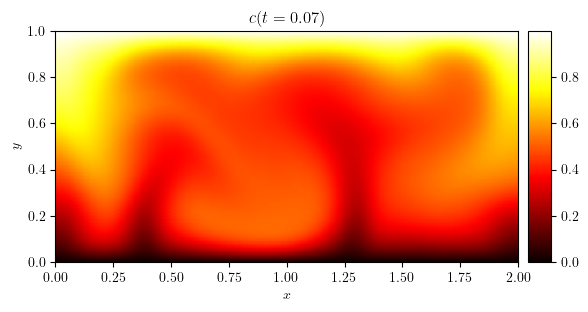

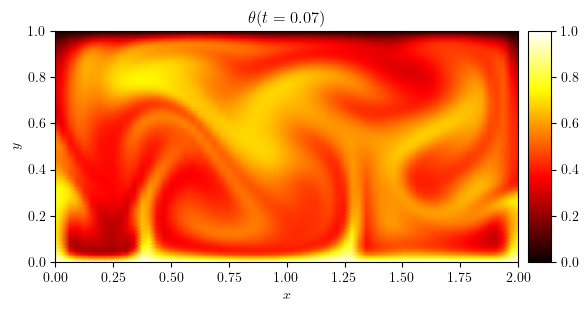

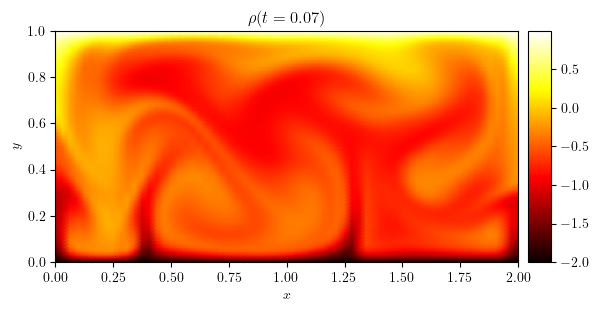

In [ ]:
c, theta, rho = simulation['c', 'theta', 'rho']
mesh = c.mesh

time_index = -1

t_c = c.time_series[time_index]
fig, ax = plot_colormap(c.series[time_index], title=f'$c(t={t_c:.2f})$')
write(fig, f'{get_ipynb_file_name()}_c(t={t_c:.2f})', './figures', file_ext=['pdf', 'png'], close=False, pickle=False)

t_theta = theta.time_series[time_index]
fig, ax = plot_colormap(theta.series[time_index], title=f'$\\theta(t={t_theta:.2f})$')
write(fig, f'{get_ipynb_file_name()}_theta(t={t_theta:.2f})', './figures', file_ext=['pdf', 'png'], close=False, pickle=False)

assert np.isclose(t_c, t_theta)
rho = c.series[time_index] - beta * theta.series[time_index]
fig, ax = plot_colormap(rho, title=f'$\\rho(t={t_c:.2f})$')
write(fig, f'{get_ipynb_file_name()}_rho(t={t_c:.2f})', './figures', file_ext=['pdf', 'png'], close=False, pickle=False)

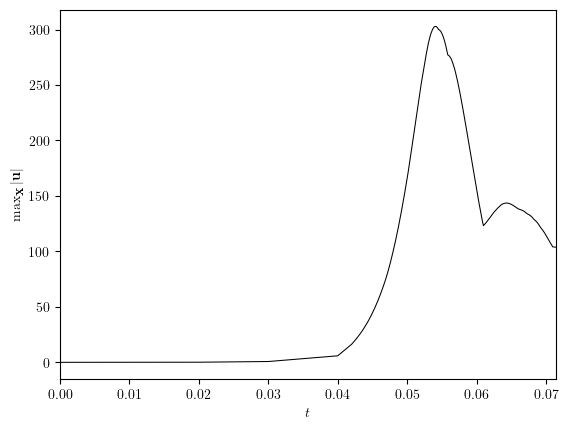

In [5]:
u = simulation['u']
u_max = [maximum(i) for i in u.series]

fig, ax = plot_line((u.time_series, u_max), x_label='$t$', y_label='$\max_{\\textbf{x}}|\\textbf{u}|$')
write(fig, f'{get_ipynb_file_name()}_umax(t)', './figures', close=False, pickle=False)

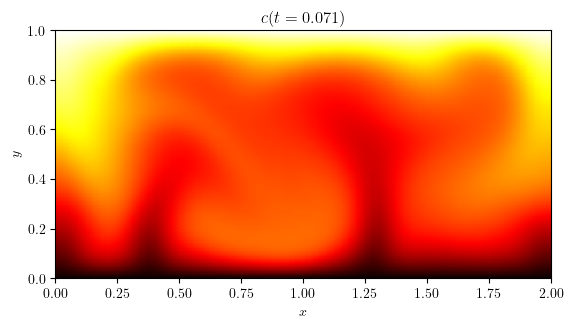

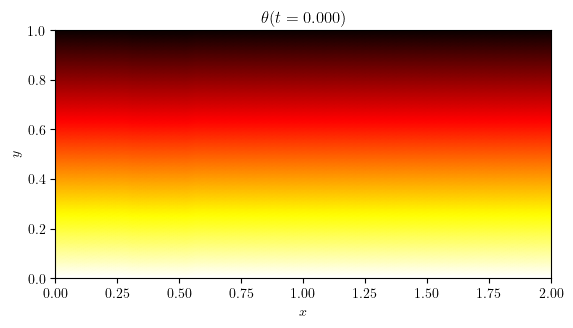

: 

In [ ]:
slc = slice(0, None, 2)

series = (c, theta)
tex_names = ('c', '\\theta')

for i, n in zip(series, tex_names, strict=True):
    titles = [f'${n}(t={t:.3f})$' for t in i.time_series[slc]]
    colorbars = [False] * len(titles)
    anim = create_animation(
        plot_colormap,
    )(i.series[slc], title=titles, colorbar=colorbars)
    write(anim, f'{get_ipynb_file_name()}_{i.name}(t)', './figures')